# ✨ Edge Mesh Generation and Visualization Tutorial

In this tutorial, we'll explore the functions in the `surfmesh.edge` module, including:
- `convert_2d_face_to_3d`
- `mesh_between_edges`
- `quad_faces_from_edges`
- `rectangle_perimeter`

We'll demonstrate how to use these functions and visualize the results.

## 📦 1. Import Dependencies

In [39]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib.collections import PatchCollection

from surfmesh import convert_2d_face_to_3d, mesh_between_edges, quad_faces_from_edges, rectangle_perimeter

## 🔲 2. Generate a Rectangle Perimeter using `rectangle_perimeter`

In [5]:
# Parameters for the rectangle perimeter
width, height = 2.0, 1.0

width_edge  = np.linspace(0, width, 20)
height_edge = np.linspace(0, height, 10)

# Generate the rectangle perimeter
rectangle = rectangle_perimeter(width_edge, height_edge)

print(f"Generated rectangle perimeter with {rectangle.shape} points.")

Generated rectangle perimeter with (2, 57) points.


## 📊 3. Visualize the Rectangle Perimeter

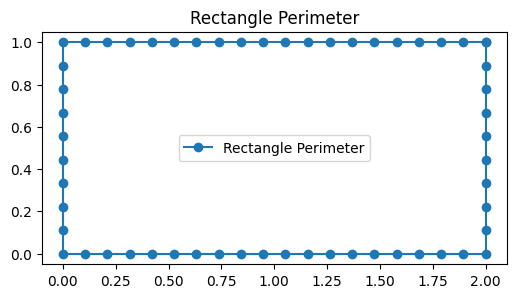

In [6]:
plot_dir = Path("plots")
plot_dir.mkdir(exist_ok=True, parents=True)

fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(rectangle[0], rectangle[1], marker="o", label="Rectangle Perimeter")
ax.set_aspect("equal")
ax.set_title("Rectangle Perimeter")
ax.legend()
fig.savefig(plot_dir / "rectangle_perimeter.jpg", dpi=150, bbox_inches="tight")
plt.show()

## 🔄 4. Generate a Mesh Between Two Edges using `mesh_between_edges`

In [28]:
# Define two edges
x = np.linspace(0, np.pi/2, 20)
edge1 = np.array([x, np.sin(x)])
edge2 = np.array([x, np.exp(x)])

radial_resolution = 10

# Generate the mesh between the edges
mesh = mesh_between_edges([edge1, edge2], radial_resolution)

print(f"Generated mesh with {mesh.shape[0]} quadrilateral faces.")

Generated mesh with 190 quadrilateral faces.


## 📊 5. Visualize the Mesh Between Edges

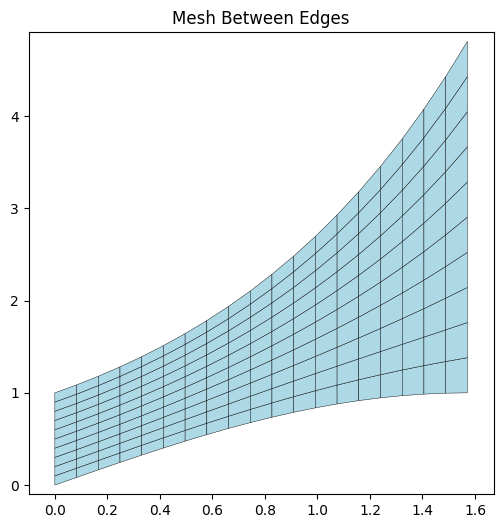

In [41]:
fig, ax = plt.subplots(figsize=(6, 6))
collection = PatchCollection(list(map(Polygon, mesh)), facecolor='lightblue', edgecolor='k', linewidth=0.3)
ax.add_collection(collection)
ax.set_xlim(mesh[:, :, 0].min() - 0.1, mesh[:, :, 0].max() + 0.1)
ax.set_ylim(mesh[:, :, 1].min() - 0.1, mesh[:, :, 1].max() + 0.1)
ax.set_title("Mesh Between Edges")
fig.savefig(plot_dir / "mesh_between_edges.jpg", dpi=150, bbox_inches="tight")
plt.show()

## 🔺 6. Convert 2D Face to 3D using `convert_2d_face_to_3d`

In [43]:
# Define a 2D face
fixed_value = 2
fixed_axis = 1
# Convert the 2D face to 3D
face_3d = convert_2d_face_to_3d(mesh, fixed_axis, fixed_value)

print(f"Converted 2D face to 3D with z=2.0.")
face_3d.shape

Converted 2D face to 3D with z=2.0.


(190, 4, 3)

## 📊 7. Visualize the 3D Face

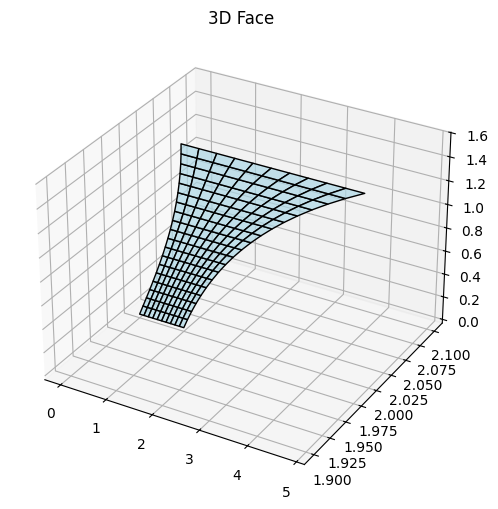

In [44]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
ax.add_collection3d(Poly3DCollection(face_3d, facecolors="lightblue", edgecolors="k", alpha=0.7))
ax.set_title("3D Face")
# ax.set_xlim(-0.5, 1.5)
# ax.set_ylim(-0.5, 1.5)
# ax.set_zlim(1.5, 2.5)
fig.savefig(plot_dir / "3d_face.jpg", dpi=150, bbox_inches="tight")
plt.show()

## ✅ Summary

- `rectangle_perimeter` generates a rectangle perimeter with specified resolution.
- `mesh_between_edges` creates a quadrilateral mesh between two edges.
- `convert_2d_face_to_3d` lifts a 2D face into 3D space.
- All results can be visualized using Matplotlib.